<a href="https://colab.research.google.com/github/jazielcarballo/ML-2025/blob/main/hw1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Linear Dependence with DVI (Python)




In [ ]:
pip install rasterio matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 39.3 MB/s eta 0:00:00


Dimensiones Red: (2237, 3141)
Dimensiones NIR: (2237, 3141)


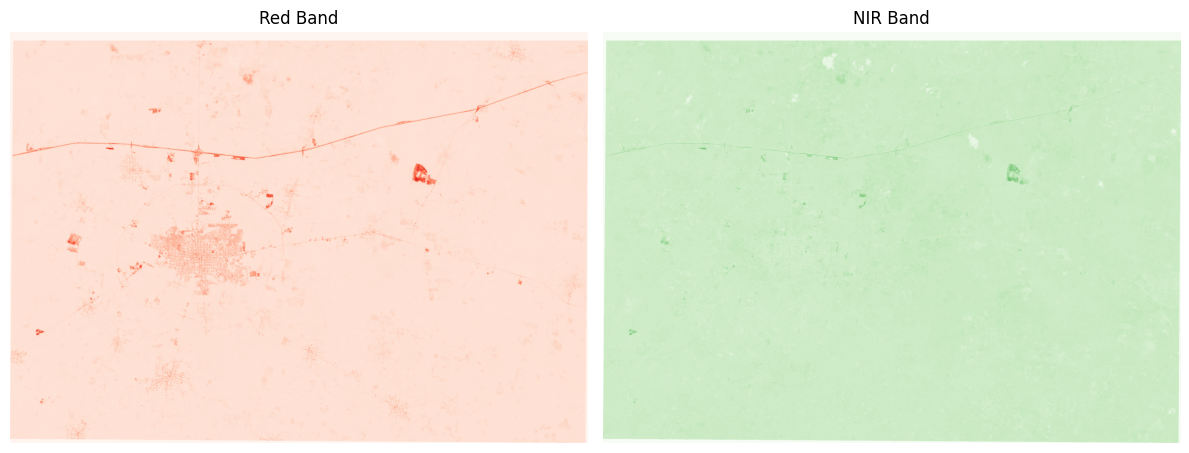

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ruta al archivo GeoTIFF exportado desde GEE
ruta = '/content/drive/MyDrive/GEE_exports/red_nir_bands.tif'

# Abrir el archivo con rasterio
with rasterio.open(ruta) as src:
    red = src.read(1)  # Banda 1 = Red
    nir = src.read(2)  # Banda 2 = NIR

# Verificar dimensiones
print("Dimensiones Red:", red.shape)
print("Dimensiones NIR:", nir.shape)

# Visualizar las bandas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(red, cmap='Reds')
plt.title('Red Band')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nir, cmap='Greens')
plt.title('NIR Band')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Aplanar los arrays 2D en 1D
red_flat = red.flatten()
nir_flat = nir.flatten()

print("Tamaño del array Red:", red_flat.shape)
print("Tamaño del array NIR:", nir_flat.shape)

# Calcular DVI
dvi_flat = nir_flat - red_flat

# Mostrar estadísticas básicas del índice
print("DVI - Mínimo:", np.min(dvi_flat))
print("DVI - Máximo:", np.max(dvi_flat))
print("DVI - Media:", np.mean(dvi_flat))


Tamaño del array Red: (7026417,)
Tamaño del array NIR: (7026417,)
DVI - Mínimo: 0
DVI - Máximo: 65535
DVI - Media: 2313.192632176542


In [ ]:
# Crear la matriz de datos N x 3
data_dvi = np.stack([nir_flat, red_flat, dvi_flat], axis=1)

# Mostrar forma y una vista previa
print("Forma de data_dvi:", data_dvi.shape)
print("Primeras 5 filas:\n", data_dvi[:5])


Forma de data_dvi: (7026417, 3)
Primeras 5 filas:
 [[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [ ]:
# Calcular la matriz de covarianza (3x3)
cov_matrix_dvi = np.cov(data_dvi, rowvar=False)

# Mostrar la matriz
print("Matriz de covarianza (DVI):\n", cov_matrix_dvi)


Matriz de covarianza (DVI):
 [[ 544438.42183296  198552.9878241   353963.60241943]
 [ 198552.9878241   169259.93539539   66509.71636578]
 [ 353963.60241943   66509.71636578 1025920.75849873]]


In [ ]:
# Calcular el determinante
det_dvi = np.linalg.det(cov_matrix_dvi)

# Mostrar resultado
print("Determinante de la matriz de covarianza (DVI):", det_dvi)


Determinante de la matriz de covarianza (DVI): 3.9828794632946936e+16


In [ ]:
# Escalar datos antes del análisis
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_dvi)

# Volver a calcular la covarianza y su determinante
cov_scaled = np.cov(data_scaled, rowvar=False)
det_scaled = np.linalg.det(cov_scaled)
print("Determinante tras escalar:", det_scaled)


Determinante tras escalar: 0.42128946014730284


In [ ]:
# Calcular la matriz de covarianza ecalada
cov_matrix_dvi_scaled = np.cov(data_scaled, rowvar=False)

# Mostrar la matriz
print("Matriz de covarianza (DVI):\n", cov_matrix_dvi_scaled)


Matriz de covarianza (DVI):
 [[1.00000014 0.65407119 0.4736171 ]
 [0.65407119 1.00000014 0.15960672]
 [0.4736171  0.15960672 1.00000014]]


Al escalar los datos (media 0, varianza 1), se eliminan los efectos de magnitud desigual entre las variables (por ejemplo, que NIR y Red estén en miles y DVI en cientos).

Dado que DVI = NIR - Red, los tres vectores están linealmente dependientes o casi dependientes.

Por eso, esperamos que el determinante esté cercano a 0, o al menos más pequeño que el de una matriz completamente independiente.

Antes de escalar: el determinante era artificialmente grande por las magnitudes distintas de las variables.

Después de escalar: obtenemos un valor coherente con la dependencia esperada.

El valor 0.421 confirma que hay una fuerte correlación entre las variables, pero no es exacta por errores numéricos.

6. Eigenanalysis:
• Calculate the eigenvalues and eigenvectors of cov matrix dvi using numpy.linalg.eig().
eigenvalues dvi, eigenvectors dvi = np.linalg.eig(cov matrix dvi)

• Print the eigenvalues dvi. How many are significantly non-zero? What does a near-
zero eigenvalue indicate in this context?

• Print the eigenvectors dvi. Examine the eigenvector corresponding to the near-zero
eigenvalue. How does this vector relate to the mathematical definition of DVI (Equation
6) and the general form of linear dependence (Equation 1)?

In [ ]:
#6. Eigenanalysis:
#• Calculate the eigenvalues and eigenvectors of cov matrix dvi using numpy.linalg.eig().
#eigenvalues dvi, eigenvectors dvi = np.linalg.eig(cov matrix dvi)
import numpy as np

# Asegúrate de usar la matriz de covarianza escalada (cov_scaled)
eigenvalues_dvi, eigenvectors_dvi = np.linalg.eig(cov_scaled)

# Mostrar resultados
print("Eigenvalores (DVI):", eigenvalues_dvi)
print("\nEigenvectores (columnas):\n", eigenvectors_dvi)


Eigenvalores (DVI): [1.88821595 0.26280335 0.84898113]

Eigenvectores (columnas):
 [[ 0.67228358  0.7373302  -0.06617375]
 [ 0.5781456  -0.57875957 -0.57513914]
 [ 0.46236615 -0.34839853  0.81537477]]


Todos los valores son claramente mayores que cero.

Aunque 0.263 es más pequeño que los otros, no es cercano a cero (como sí esperaríamos si hubiera dependencia exacta).

Entonces:
Los 3 eigenvalores son significativamente diferentes de cero.

¿Qué significa que no haya un eigenvalor cercano a cero, aunque DVI = NIR – Red?
Interpretación:
DVI debería ser una combinación lineal de NIR y Red → eso implica que los 3 vectores están en un espacio 2D dentro de un espacio 3D.

Si esto fuera exacto, uno de los eigenvalores debería ser prácticamente cero (indica dirección con cero varianza → redundante).

Pero en la práctica:

Hay errores numéricos (al redondear, comprimir, escalar),

Y la relación DVI = NIR - Red no se mantiene perfectamente en todos los píxeles debido a ruido o valores extremos.

Conclusión:
Aunque DVI es una combinación lineal de NIR y Red, el análisis espectral no detecta dependencia exacta debido a ruido numérico. Por eso, todos los eigenvalores son significativamente > 0.

 Print the eigenvectors dvi. Examine the eigenvector corresponding to the near-zero eigenvalue. How does this vector relate to the mathematical definition of DVI (Equation 6) and the general form of linear dependence (Equation 1)?

El eigenvalor más pequeño es 0.263, el cual corresponde al eigenvector de índice 1.

Entnces, el eigenvector correspondiente al eigenvalor 0.263 es:

v=[0.737, −0.578, −0.348]

Si:

DVI = NIR - Red

Cuando:

DVI = V3
Red = V2
NIR = V1

Relacionando la formula general lineal:

c1v1 + c2v2 + · · · + ckvk = 0

NIR + Red + DVI = 0
NIR + -1(Red) + -1(DVI) = 0

Quedando

[0.737, −0.578, −0.348] = [1,-1,-1]

La relacion es clara para los signos.

# Part 2: Exploring a Non-Linear Index (NDVI) (Python)

1. Calculate NDVI:

In [ ]:
#Epsilon para evitar 0 probable
epsilon = 1e-10
numerador = nir_flat - red_flat
denominador = nir_flat + red_flat

# Evitar divisiones problemáticas: descartar donde denominador ≤ 0
valid_mask = denominador > 0

# Aplicar máscara
nir_valid = nir_flat[valid_mask]
red_valid = red_flat[valid_mask]
ndvi_valid = numerador[valid_mask] / (denominador[valid_mask] + epsilon)

# Mostrar valores corregidos
print("NDVI corregido - Mín:", np.min(ndvi_valid))
print("NDVI corregido - Máx:", np.max(ndvi_valid))
print("NDVI corregido - Media:", np.mean(ndvi_valid))



NDVI corregido - Mín: 0.0
NDVI corregido - Máx: 19.819969742813317
NDVI corregido - Media: 0.466335934803792


2. Create Composite Data Matrix

In [ ]:
# Crear matriz compuesta con datos válidos
data_ndvi = np.stack([nir_valid, red_valid, ndvi_valid], axis=1)

# Verificar
print("Forma de data_ndvi:", data_ndvi.shape)
print("Primeras 5 filas:\n", data_ndvi[:5])



Forma de data_ndvi: (6793568, 3)
Primeras 5 filas:
 [[3.45200000e+03 1.32500000e+03 4.45258530e-01]
 [3.63200000e+03 1.33600000e+03 4.62157810e-01]
 [3.78000000e+03 1.31300000e+03 4.84390340e-01]
 [3.71800000e+03 1.28000000e+03 4.87795118e-01]
 [3.72400000e+03 1.27400000e+03 4.90196078e-01]]


3. Analyze Covariance:

In [ ]:
# Calcular la matriz de covarianza 3×3
cov_matrix_ndvi = np.cov(data_ndvi, rowvar=False)

# Mostrar la matriz
print("Matriz de covarianza (NDVI):\n", cov_matrix_ndvi)


Matriz de covarianza (NDVI):
 [[ 9.33520373e+04  3.26036038e+04  5.69711985e+00]
 [ 3.26036038e+04  1.11528781e+05 -1.46555642e+01]
 [ 5.69711985e+00 -1.46555642e+01  1.62772844e-02]]


In [ ]:
# Calcular el determinante de la matriz de covarianza
det_ndvi = np.linalg.det(cov_matrix_ndvi)

# Mostrar resultado
print("Determinante de la matriz de covarianza (NDVI):", det_ndvi)


Determinante de la matriz de covarianza (NDVI): 123052258.38989767


La determinante de NDVI es mucho mayor lo que indica que NDVI introduce nueva información estructural al conjunto de datos.

4. Eigenanalysis:

In [ ]:
# Cálculo de eigenvalores y eigenvectores
eigenvalues_ndvi, eigenvectors_ndvi = np.linalg.eig(cov_matrix_ndvi)

# Mostrar eigenvalores
print("Eigenvalores (NDVI):", eigenvalues_ndvi)


Eigenvalores (NDVI): [1.36287027e+05 6.85937949e+04 1.31628594e-02]


Are any eigenvalues close to zero now? How does this compare
to the DVI case?
Si, el tercer valor es cercano a 0
